<a href="https://colab.research.google.com/github/Aboubacar2012/Udacity-AI-for-Healthcare-NanoDegree/blob/main/Project_CNN_Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Plot ad hoc minist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if need) the MNIST dataset
(X_train, y_train), (X_test, y_test)=mnist.load_data()

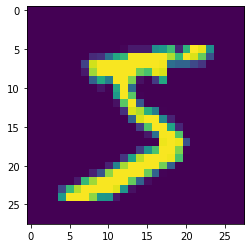

In [2]:
plt.imshow(X_train[0])

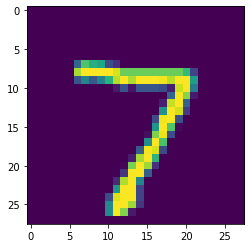

In [3]:
plt.imshow(X_test[0])

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

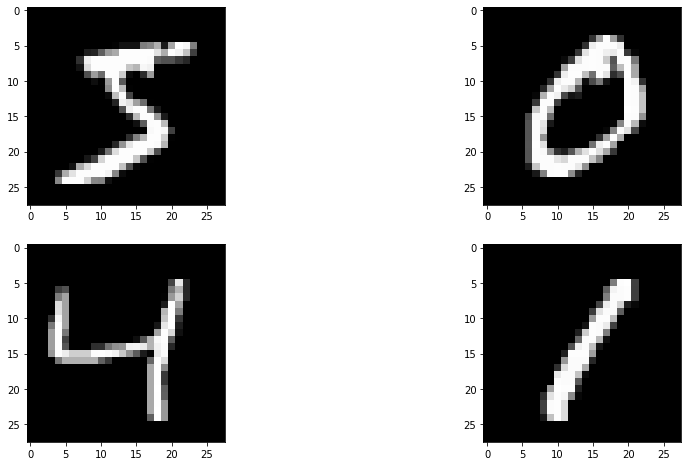

In [6]:
# plot 4 images as gray scale 
plt.figure(figsize=(15,8))
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
#show the plot 
plt.show()

**Baseline Model with Multilayer Perceptrons with MNIST Dataset**

Do we really need a complex model like a convolutional neural network to get the best results
with MNIST? You can get good results using a very simple neural network model with a single
hidden layer. In this section we will create a simple Multilayer Perceptron model that achieves an
error rate of 1.74%. We will use this as a baseline for comparison to more complex convolutional
neural network models. Let’s start o↵ by importing the classes and functions we will need.

In [7]:
# Import the necessaries librairies
import numpy as np
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Dropout 
from keras.utils import np_utils

In [8]:
# fix random seed for reproducibility 
seed=7
np.random.seed(seed)

In [9]:
# Load data  (done above)
# load (downloaded if need) the MNIST dataset
#(X_train, y_train), (X_test, y_test) = mnist.load_data()

**Prepare MNIST Dataset for Modeling **

The training dataset is structured as a 3-dimensional array of instance, image width and
image height. For a Multilayer Perceptron model we must reduce the images down into a vector
of pixels. In this case the 28 X 28 sized images will be 784 pixel input vectors. We can do
this transform easily using the reshape() function on the NumPy array. The pixel values are
integers, so we cast them to floating point values so that we can normalize them easily in the
next step.

In [10]:
# Flatten 28X28 images to a 784 vector for each image 
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train=X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test=X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

In [11]:
num_pixels

784

In [12]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

The pixel values are gray scale between 0 and 255. It is almost always a good idea to
perform some scaling of input values when using neural network models. Because the scale is
well known and well behaved, we can very quickly normalize the pixel values to the range 0 and
1 by dividing each value by the maximum of 255.

In [13]:
# Normalize input from 0-255 to 0-1
X_train=X_train/255
X_test=X_test/255

Finally, the output variable is an integer from 0 to 9. This is a multiclass classification
problem. As such, it is good practice to use a one hot encoding of the class values, transforming
the vector of class integers into a binary matrix. We can easily do this using the built-in
np utils.to categorical() helper function in Keras.

In [14]:
# One hot encode outputs variables 
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
num_classes=y_test.shape[1]

We are now ready to create our simple neural network model. We will define our model in a
function. This is handy if you want to extend the example later and try and get a better score.

In [15]:
# Define baseline model 
def baseline_model():
  # create model
  model = Sequential()
  model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal' , activation='relu'))
  model.add(Dense(num_classes, kernel_initializer='normal' , activation='softmax'))
  # Compile model
  model.compile(loss='categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])
  return model

We can now fit and evaluate the model. The model is fit over 10 epochs with updates every
200 images. The test data is used as the validation dataset, allowing you to see the skill of the
model as it trains. A verbose value of 2 is used to reduce the output to one line for each training
epoch. Finally, the test dataset is used to evaluate the model and a classification error rate is
printed.

In [16]:
# Build the model 
model=baseline_model()
# Fit the model 
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model 
scores=model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/10
300/300 - 2s - loss: 0.2766 - accuracy: 0.9201 - val_loss: 0.1406 - val_accuracy: 0.9588 - 2s/epoch - 7ms/step
Epoch 2/10
300/300 - 1s - loss: 0.1093 - accuracy: 0.9688 - val_loss: 0.0903 - val_accuracy: 0.9722 - 1s/epoch - 4ms/step
Epoch 3/10
300/300 - 1s - loss: 0.0705 - accuracy: 0.9798 - val_loss: 0.0783 - val_accuracy: 0.9760 - 1s/epoch - 4ms/step
Epoch 4/10
300/300 - 1s - loss: 0.0494 - accuracy: 0.9857 - val_loss: 0.0665 - val_accuracy: 0.9783 - 1s/epoch - 4ms/step
Epoch 5/10
300/300 - 1s - loss: 0.0359 - accuracy: 0.9903 - val_loss: 0.0624 - val_accuracy: 0.9806 - 1s/epoch - 4ms/step
Epoch 6/10
300/300 - 1s - loss: 0.0261 - accuracy: 0.9932 - val_loss: 0.0611 - val_accuracy: 0.9798 - 1s/epoch - 4ms/step
Epoch 7/10
300/300 - 1s - loss: 0.0193 - accuracy: 0.9951 - val_loss: 0.0668 - val_accuracy: 0.9784 - 1s/epoch - 4ms/step
Epoch 8/10
300/300 - 1s - loss: 0.0149 - accuracy: 0.9966 - val_loss: 0.0615 - val_accuracy: 0.9811 - 1s/epoch - 4ms/step
Epoch 9/10
300/300 - 1s 